In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('pitch-features/pitch-features-2023.csv', quotechar='"')

In [133]:
df.describe()

,game_id,month_number,year,at_bat_number,pitch_number,pitcher_id,pitcher_team_id,batter_id,batter_team_id,bat_side_multiplier,...,normalized_strike_zone_location_x,plate_location_x,plate_location_z,backspin,sidespin,gyrospin,pitch_release_position_x,pitch_release_position_y,pitch_release_position_z,pitch_location_zone
count,717679.000000,717679.000000,717679.0,717679.000000,717679.000000,717679.000000,717679.000000,717679.000000,717679.000000,717679.000000,...,717546.000000,717675.000000,717675.000000,712692.000000,712692.000000,712692.000000,715707.000000,715707.000000,715707.000000,693241.000000
mean,717565.560543,6.491280,2023.0,38.698543,2.912471,625396.551397,128.652738,630706.105101,128.716623,0.166159,...,19.092535,0.035608,2.281793,794.713131,-160.397412,667.622865,-0.859551,54.060074,5.772194,11.445728
std,703.602160,1.766955,0.0,22.598959,1.736173,58483.554223,14.259230,56481.887657,14.275243,0.986100,...,98.728095,0.833071,0.968923,1026.439976,1087.864554,1353.953918,1.826576,0.465350,0.540388,7.545622
min,716352.000000,3.000000,2023.0,1.000000,1.000000,425794.000000,108.000000,408234.000000,108.000000,-1.000000,...,-534.410000,-4.834319,-18.927051,-3207.334257,-2923.268937,-3157.423140,-4.852743,48.781480,0.759441,1.000000
25%,716952.000000,5.000000,2023.0,19.000000,1.000000,600921.000000,115.000000,605137.000000,115.000000,-1.000000,...,-47.020000,-0.524701,1.648891,178.890831,-1115.251247,-163.096906,-2.137408,53.753870,5.494401,5.000000
50%,717566.000000,6.000000,2023.0,38.000000,3.000000,646242.000000,133.000000,656716.000000,134.000000,1.000000,...,19.350000,0.032586,2.289296,1078.185090,-410.293849,896.604441,-1.526301,54.052012,5.814618,9.000000
75%,718175.000000,8.000000,2023.0,57.000000,4.000000,668678.000000,141.000000,669127.000000,141.000000,1.000000,...,84.830000,0.591573,2.923281,1587.828931,860.535162,1787.812478,0.751425,54.365080,6.101158,19.000000
max,718782.000000,10.000000,2023.0,121.000000,16.000000,701643.000000,158.000000,807799.000000,158.000000,1.000000,...,1419.090000,11.767797,11.023922,2977.922279,3097.108962,3227.946658,4.743547,57.491576,8.112233,24.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717679 entries, 0 to 717678
Data columns (total 54 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   game_id                            717679 non-null  int64  
 1   play_id                            717679 non-null  object 
 2   month_number                       717679 non-null  int64  
 3   year                               717679 non-null  int64  
 4   game_date                          717679 non-null  object 
 5   at_bat_number                      717679 non-null  int64  
 6   pitch_number                       717679 non-null  int64  
 7   pitcher_id                         717679 non-null  int64  
 8   pitcher_team_id                    717679 non-null  int64  
 9   pitch_hand                         717679 non-null  object 
 10  batter_id                          717679 non-null  int64  
 11  batter_team_id                     7176

In [14]:
# Dropping all nulls for play_id
df=df.dropna(subset = ['play_id'])

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

def prepare_swing_df(this_df, drop_keys=True):
    if drop_keys:
        new_df = this_df.drop([
            'game_id',
            'play_id'
        ], axis=1)
    else:
        new_df = this_df.copy()
        
    new_df = new_df.drop([
        'month_number',
        'year',
        'game_date',
        'at_bat_number',
        'pitch_number',
        'pitcher_id',
        'pitcher_team_id',
        'batter_id',
        'batter_team_id',
        'swing_miss',
        'swing_contact',
        'pitch_result',
        'pitch_strike',
        'pitch_ball',
        'hit_in_play',
        'relative_strike_zone_location',
        'relative_strike_zone_location_x',
        'plate_location_x',
        'plate_location_z',
        'inferred_backspin_rate',
        'inferred_sidespin_rate',
        'inferred_gyrospin_rate',
        'pitch_type',
        'bat_side_multiplier',
        'relative_strike_zone_location_z',
        'normalized_strike_zone_location_x'
        ], axis=1)

    new_df = new_df.drop(['hit'], axis=1)

    # Splitting the 'count_balls_strikes' column into two new columns
    new_df[['count_balls', 'count_strikes']] = new_df['count_balls_strikes'].str.split('-', expand=True)
    new_df['count_balls'] = new_df['count_balls'].astype(int)
    new_df['count_strikes'] = new_df['count_strikes'].astype(int)
    
    # onehot_encode remaining text values
    new_df['pitch_hand_encoded'] = encoder.fit_transform(new_df['pitch_hand'])
    new_df['bat_side_encoded'] = encoder.fit_transform(new_df['bat_side'])
    new_df['pitch_type_desc_encoded'] = encoder.fit_transform(new_df['pitch_type_desc'])
    
    new_df.drop(['count_balls_strikes', 'pitch_hand', 'bat_side', 'pitch_type_desc'], axis=1, inplace=True)
    
    new_df = new_df.dropna()

    return new_df

In [112]:
swing_df = prepare_swing_df(df)

In [105]:
swing_df.head()

,count_outs,runner_string,inning,pitcher_team_score,batter_team_score,swing,spin_rate,extension,pitch_speed,spin_angle,...,gyrospin,pitch_release_position_x,pitch_release_position_y,pitch_release_position_z,pitch_location_zone,count_balls,count_strikes,pitch_hand_encoded,bat_side_encoded,pitch_type_desc_encoded
0,2,0,4,0,4,1,2003.245692,6.432632,85.346989,241.295,...,895.460559,-2.669248,54.067370,5.512171,1.0,1,2,1,0,0
1,1,0,3,0,2,1,2379.207403,5.996356,94.310076,215.205,...,1522.451525,-2.475481,54.503646,5.902477,19.0,0,2,1,1,4
2,0,100,5,0,4,1,2148.562921,6.436463,82.633024,53.632,...,1697.571021,-1.490049,54.063539,5.737820,3.0,2,1,1,1,1
3,1,1,6,5,0,0,2235.609966,6.258957,94.441595,198.256,...,792.707151,-1.204289,54.241045,6.165444,19.0,0,0,1,0,4
4,1,1,7,5,2,1,2502.567730,6.614201,97.883346,217.265,...,478.922040,-1.576552,53.885801,6.008346,8.0,0,0,1,0,4


In [66]:
swing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688187 entries, 0 to 717678
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   count_outs                688187 non-null  int64  
 1   runner_string             688187 non-null  int64  
 2   inning                    688187 non-null  int64  
 3   pitcher_team_score        688187 non-null  int64  
 4   batter_team_score         688187 non-null  int64  
 5   swing                     688187 non-null  int64  
 6   spin_rate                 688187 non-null  float64
 7   extension                 688187 non-null  float64
 8   pitch_speed               688187 non-null  float64
 9   spin_angle                688187 non-null  float64
 10  vertical_break_induced    688187 non-null  float64
 11  horizontal_break          688187 non-null  float64
 12  plate_speed               688187 non-null  float64
 13  pitch_minus_plate         688187 non-null  float6

In [56]:
swing_df.isnull().sum()

count_outs                  0
runner_string               0
inning                      0
pitcher_team_score          0
batter_team_score           0
swing                       0
spin_rate                   0
extension                   0
pitch_speed                 0
spin_angle                  0
vertical_break_induced      0
horizontal_break            0
plate_speed                 0
pitch_minus_plate           0
backspin                    0
sidespin                    0
gyrospin                    0
pitch_release_position_x    0
pitch_release_position_y    0
pitch_release_position_z    0
pitch_location_zone         0
count_balls                 0
count_strikes               0
pitch_hand_encoded          0
bat_side_encoded            0
pitch_type_desc_encoded     0
dtype: int64

In [57]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
X = swing_df.drop(['swing'], axis=1)
y = swing_df['swing']

# Create a logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=100)

# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Get the selected feature indices
selected_indices = rfe.support_

# Get the names of all features
feature_names = X.columns  # Provide the names of features here

# Get the names of selected features
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_indices) if selected]

# Print the selected feature names
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: ['count_outs', 'vertical_break_induced', 'pitch_minus_plate', 'pitch_release_position_y', 'pitch_release_position_z', 'pitch_location_zone', 'count_balls', 'count_strikes', 'pitch_hand_encoded', 'bat_side_encoded']


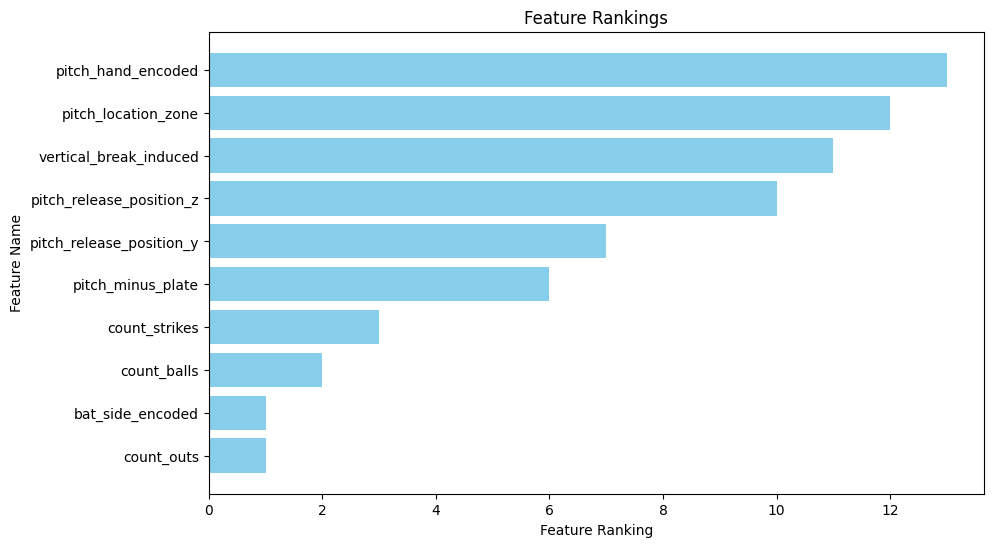

In [58]:
import matplotlib.pyplot as plt

# Assuming you have selected_feature_names as a list of selected feature names
# and rfe as the RFE object after fitting

# Get the ranking of the features
# The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
# Selected (i.e., estimated best) features are assigned rank 1.
ranking = rfe.ranking_

# Zip the feature names and their rankings
feature_rankings = zip(selected_feature_names, ranking)

# Sort the features based on their rankings
sorted_features = sorted(feature_rankings, key=lambda x: x[1])

# Unzip the sorted features
sorted_feature_names, sorted_rankings = zip(*sorted_features)

# Create a side bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_rankings, color='skyblue')
plt.xlabel('Feature Ranking')
plt.ylabel('Feature Name')
plt.title('Feature Rankings')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
X = swing_df.drop(['swing'], axis=1)
y = swing_df['swing']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating logistic regression model
model = LogisticRegression()

# Fitting the model with training data
model.fit(X_train, y_train)

# Predicting the test results
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6793201857631926
Confusion Matrix:
[[58214 31572]
 [23600 58661]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68     89786
           1       0.65      0.71      0.68     82261

    accuracy                           0.68    172047
   macro avg       0.68      0.68      0.68    172047
weighted avg       0.68      0.68      0.68    172047



In [130]:
def show_swing_probability(keys_df, features_df):
    max_score = features_df['swing_probability'].max()
    min_score = features_df['swing_probability'].min()

    max_row = keys_df.loc[features_df[features_df['swing_probability'] == max_score].index]
    min_row = keys_df.loc[features_df[features_df['swing_probability'] == min_score].index]

    max_game_id = max_row['game_id'].iloc[0]
    max_play_id = max_row['play_id'].iloc[0]

    min_game_id = min_row['game_id'].iloc[0]
    min_play_id = min_row['play_id'].iloc[0]

    max_value = { 
        "game_id": max_game_id, 
        "play_id": max_play_id, 
        "probability": max_score,
        "endpoint": f"https://research.mlb.com/games/{max_game_id}/plays/{max_play_id}"
    }

    min_value = { 
        "game_id": min_game_id, 
        "play_id": min_play_id, 
        "probability": min_score,
        "endpoint": f"https://research.mlb.com/games/{min_game_id}/plays/{min_play_id}"
    }

    print(max_value)
    print(min_value)

In [132]:
random_rows = df.sample(n=1000)
random_rows = prepare_swing_df(random_rows, drop_keys=False)
random_rows = random_rows.dropna()
random_keys = random_rows[['game_id', 'play_id']]
random_features = random_rows.drop(['game_id', 'play_id'], axis=1)
random_features = random_features.drop(['swing'], axis=1)

# Predict probabilities
probabilities = model.predict_proba(random_features)

# Extracting the probability of swinging (class 1)
swing_probabilities = probabilities[:, 1]

# If you want to add these probabilities back to the DataFrame to see them alongside the features
random_features['swing_probability'] = swing_probabilities

show_swing_probability(random_keys, random_features)

{'game_id': 716648, 'play_id': 'e634af53-5f7c-4eee-b6d8-a534edc5f227', 'probability': 0.8252247437624499, 'endpoint': 'https://research.mlb.com/games/716648/plays/e634af53-5f7c-4eee-b6d8-a534edc5f227'}
{'game_id': 717903, 'play_id': '1c21576b-3a2f-4b01-a66a-97eec08b180d', 'probability': 0.14617865733303512, 'endpoint': 'https://research.mlb.com/games/717903/plays/1c21576b-3a2f-4b01-a66a-97eec08b180d'}


# Random Swing Probabilities

## High Probability

Game ID:     716648<br />
Play ID:     e634af53-5f7c-4eee-b6d8-a534edc5f227<br />
Probability: 0.8252247437624499<br />
Endpoint:    https://research.mlb.com/games/717903/plays/1c21576b-3a2f-4b01-a66a-97eec08b180d

### Situation

Count: 0-2<br />
Outs:  0

### Video

<video width="600" src="swing-probability-high.mp4" controls></video>

## Low Probability

Game ID:     717903<br />
Play ID:     1c21576b-3a2f-4b01-a66a-97eec08b180d<br />
Probability: 0.14617865733303512<br />
Endpoint:    https://research.mlb.com/games/716648/plays/e634af53-5f7c-4eee-b6d8-a534edc5f227

### Situation

Count: 1-0<br />
Outs:  1

### Video

<video width="600" src="swing-probability-low.mp4" controls></video>
